In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
asrc = 100
bsrc = 100

In [3]:
def markov(a,b,paa,pab,pba,pbb):
    Pa = lambda a : {'a':a*paa,'b':a*pab}
    Pb = lambda b : {'b':b*pba,'a':b*pbb}
    a = sum([i['a'] for i in (Pa(a),Pb(b))])
    b = sum([i['b'] for i in (Pa(a),Pb(b))])
    return  a,b

In [4]:
alist ,blist = [asrc],[bsrc]
a,b = markov(asrc,bsrc,0.6,0.4,0.9,0.1)
for i in range(10):
    a,b= markov(a,b,0.6,0.4,0.9,0.1)
    alist.append(a)
    blist.append(b)
print(alist,blist)

[100, 53.8, 45.05199999999999, 40.32808, 37.777163200000004, 36.399668128, 35.65582078912, 35.254143226124796, 35.03723734210739, 34.92010816473799, 34.856858408958516] [100, 127.72, 132.96880000000002, 135.803152, 137.33370208000002, 138.16019912320002, 138.60650752652802, 138.84751406432514, 138.97765759473558, 139.0479351011572, 139.0858849546249]


## $ Pr( X_n+1 = x | X_1 = x_1, X_2 = x_2, …, X_n = x_n) = Pr( X_n+1 = x | X_n = x_n) $

In [5]:
states = ["S","I","R"]
states

['S', 'I', 'R']

In [6]:
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]
transitionName

[['SS', 'SR', 'SI'], ['RS', 'RR', 'RI'], ['IS', 'IR', 'II']]

In [7]:
transitionMatrix = np.array([[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]])
transitionMatrix

array([[0.2, 0.6, 0.2],
       [0.1, 0.6, 0.3],
       [0.2, 0.7, 0.1]])

In [8]:
def test(states,transitionName,transitionMatrix):
    m,n = transitionMatrix.shape
    if np.dot(transitionMatrix.dot(np.ones(n)),np.ones(m)) == m:
        return {n:v for n,v in zip(states,transitionName)}
test(states,transitionName,transitionMatrix)

{'S': ['SS', 'SR', 'SI'], 'I': ['RS', 'RR', 'RI'], 'R': ['IS', 'IR', 'II']}

<BarContainer object of 11 artists>

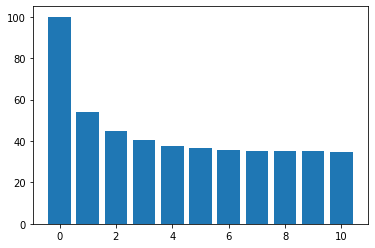

In [9]:
plt.bar(range(len(alist)),alist)

<BarContainer object of 11 artists>

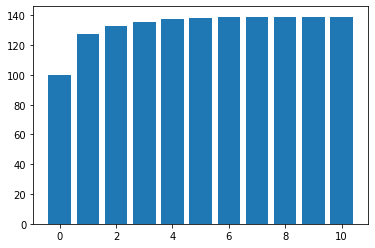

In [10]:
plt.bar(range(len(blist)),blist)

## MCMC

In [11]:
P = np.array([[0.65,0.28,0.07],[0.15,0.67,0.18],[0.12,0.36,0.52]])
P

array([[0.65, 0.28, 0.07],
       [0.15, 0.67, 0.18],
       [0.12, 0.36, 0.52]])

In [12]:
def monteCarlo(minx,maxx,miny,maxy,n,**Range):
    x = np.random.uniform(minx,maxx,n)
    y = np.random.uniform(miny,maxy,n)
    Range = Range
    return np.c_[x,y] , Range['xrangemax']

xy,r = monteCarlo(0 , 1 , 0 , 1 , 10000 ,xrangemin=2,xrangemax=3,yrangemin=1,yrangemax=2)
x,y = xy[:,1:],xy[:,:-1]
x,y,r

(array([[0.07149265],
        [0.81172794],
        [0.88532639],
        ...,
        [0.73356506],
        [0.54299635],
        [0.07011566]]), array([[0.12708215],
        [0.37949957],
        [0.36226625],
        ...,
        [0.71764332],
        [0.70108691],
        [0.06356315]]), 3)

## MCMC允许我们估计后验分布的形状，以防我们无法直接计算。为了理解MCMC方法是如何工作的，我将先介绍蒙特卡罗模型，然后再讨论马尔可夫链。
## 蒙特卡罗模型只是一种重复生成随机数字来估计固定参数的方法。通过生成随机数字并对其进行计算，蒙特卡罗法给出一个参数的近似值，但是却不能直接直接计算。

## 蒙特卡洛方法求π值

-1.0 1.0 10000
7883 10000
pi:  3.1532


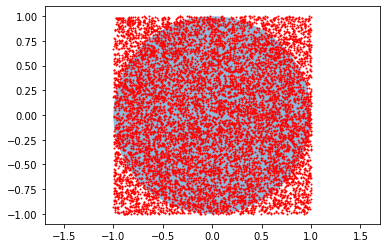

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# 投点次数
n = 10000

# 圆的信息
r = 1.0         # 半径
a, b = (0., 0.) # 圆心

# 正方形区域边界
x_min, x_max = a-r, a+r
y_min, y_max = b-r, b+r

# 在正方形区域内随机投点
x = np.random.uniform(x_min, x_max, n) # 均匀分布
y = np.random.uniform(y_min, y_max, n)
print(x_min, x_max, n)
# 计算 点到圆心的距离
d = np.sqrt((x-a)**2 + (y-b)**2)

# 统计 落在圆内的点的数目
res = sum(np.where(d < r, 1, 0))
print(res,n)
# 计算 pi 的近似值（Monte Carlo方法的精髓：用统计值去近似真实值）
pi = 4 * res / n

print('pi: ', pi)

# 画个图看看
fig = plt.figure() 
axes = fig.add_subplot(111) 
axes.plot(x, y,'ro',markersize = 1)
plt.axis('equal') # 防止图像变形

circle = Circle(xy=(a,b), radius=r, alpha=0.5)
axes.add_patch(circle)

plt.show()


In [14]:
x_min, x_max,y_min, y_max

(-1.0, 1.0, -1.0, 1.0)

### 蒙特卡罗求定积分 https://blog.csdn.net/bitcarmanlee/article/details/82716641

3334
integral:  0.3334


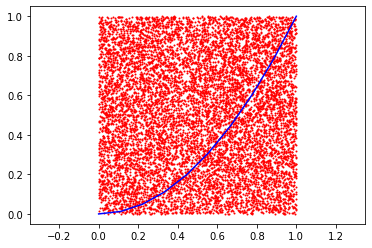

In [15]:
import numpy as np
import matplotlib.pyplot as plt

'''蒙特卡罗方法求函数 y=x^2 在[0,1]内的定积分（值）'''
def f(x):
    return x**2

# 投点次数
n = 10000

# 矩形区域边界
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0     

# 在矩形区域内随机投点
x = np.random.uniform(x_min, x_max, n) # 均匀分布
y = np.random.uniform(y_min, y_max, n)

# 统计 落在函数 y=x^2图像下方的点的数目
res = sum(np.where(y < f(x), 1, 0))
print(res)

# 计算 定积分的近似值（Monte Carlo方法的精髓：用统计值去近似真实值）
integral = res / n

print('integral: ', integral)

# 画个图看看
fig = plt.figure() 
axes = fig.add_subplot(111) 
axes.plot(x, y,'ro',markersize = 1)
plt.axis('equal') # 防止图像变形

axes.plot(np.linspace(x_min, x_max, 10), f(np.linspace(x_min, x_max, 10)), 'b-') # 函数图像
#plt.xlim(x_min, x_max)

plt.show()

## scipy中的凸包算法 计算散落点占的面积（二纬）或体积（三纬）

In [16]:
# -*- coding: utf-8 -*-

from scipy.spatial import ConvexHull
##########scipy 凸包################
points = np.random.rand(30, 2)
hull = ConvexHull(points)
{'所有点':hull.points,'边界':hull.max_bound,'纬度':hull.ndim,'计算点数量':hull.npoints,'a':hull.nsimplex,'凸壳单面形成点的指数':hull.simplices,'面积':hull.area,'形成小面的超平面方程':hull.equations,'体积':hull.volume}

{'所有点': array([[0.91087723, 0.9552367 ],
        [0.44532911, 0.72981307],
        [0.79399327, 0.46727928],
        [0.50504881, 0.90450302],
        [0.79924688, 0.9345479 ],
        [0.19149624, 0.43009115],
        [0.70137433, 0.88982236],
        [0.48630813, 0.22621321],
        [0.7921098 , 0.83909201],
        [0.874736  , 0.53036281],
        [0.07110647, 0.29512424],
        [0.30569875, 0.19831087],
        [0.50400283, 0.03056442],
        [0.04149655, 0.25317642],
        [0.69731033, 0.96508526],
        [0.68439429, 0.93272775],
        [0.74336921, 0.13813741],
        [0.21621404, 0.07961772],
        [0.28801084, 0.18218833],
        [0.28312573, 0.43555272],
        [0.66875537, 0.9575252 ],
        [0.91669057, 0.40974474],
        [0.0326516 , 0.2876876 ],
        [0.23705805, 0.55078797],
        [0.25470333, 0.74430657],
        [0.27577495, 0.1133311 ],
        [0.13027419, 0.56348168],
        [0.06534691, 0.60314978],
        [0.94858484, 0.15073269],
       

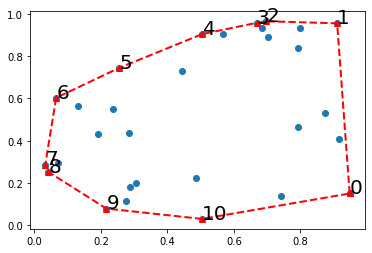

In [17]:
plt.plot(points[:,0], points[:,1], 'o')
# hull.vertices 得到凸轮廓坐标的索引值，逆时针画
hull1=hull.vertices.tolist()#要闭合必须再回到起点[0]
hull1.append(hull1[0])
plt.plot(points[hull1,0], points[hull1,1], 'r--^',lw=2)
for i in range(len(hull1)-1):
    plt.text(points[hull1[i],0], points[hull1[i],1],str(i),fontsize=20)

马尔可夫